### EFA refrences :
https://towardsdatascience.com/a-gentle-introduction-to-dimensionality-reduction-21b3fa63f1ca


https://towardsdatascience.com/exploratory-factor-analysis-vs-principal-components-from-concept-to-application-b67bbbdb82c4

### Import the necessary libaries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Factor analysis is a way to take a large data set and shrinking it to a smaller data set that is more manageable and more understandable. It’s a way to find hidden patterns, show how those patterns overlap and show what characteristics are seen in multiple patterns.

### In PCA, when we retain a component, we take into account both specific variance and common variance. While in EFA we only take into account common variance. Seeing the next figure, we can think that A’s are specific variances, B is the common variance, and C’s are error variances. In PCA we use A’s + B while in EFA we only use B


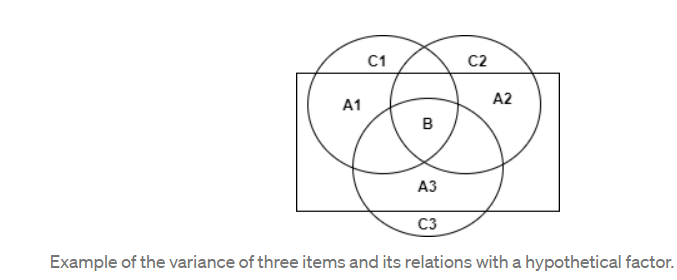

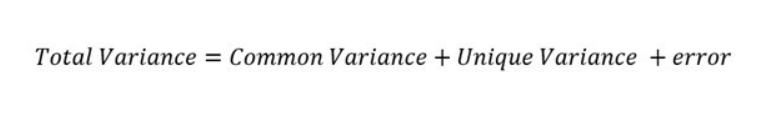

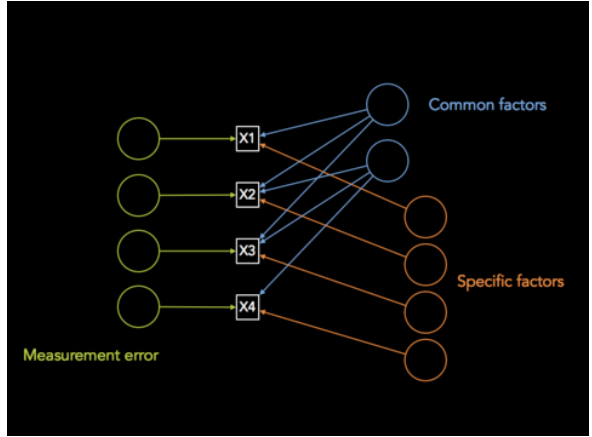


### EFA is based on the common factor model. In this model, manifest variables are expressed as a function of common factors, unique factors, and errors of measurement. Each unique factor influences only one manifest variable, and does not explain correlations between manifest variables. Common factors influence more than one manifest variable and "factor loadings" are measures of the influence of a common factor on a manifest variable.For the EFA procedure, we are more interested in identifying the common factors and the related manifest variables.

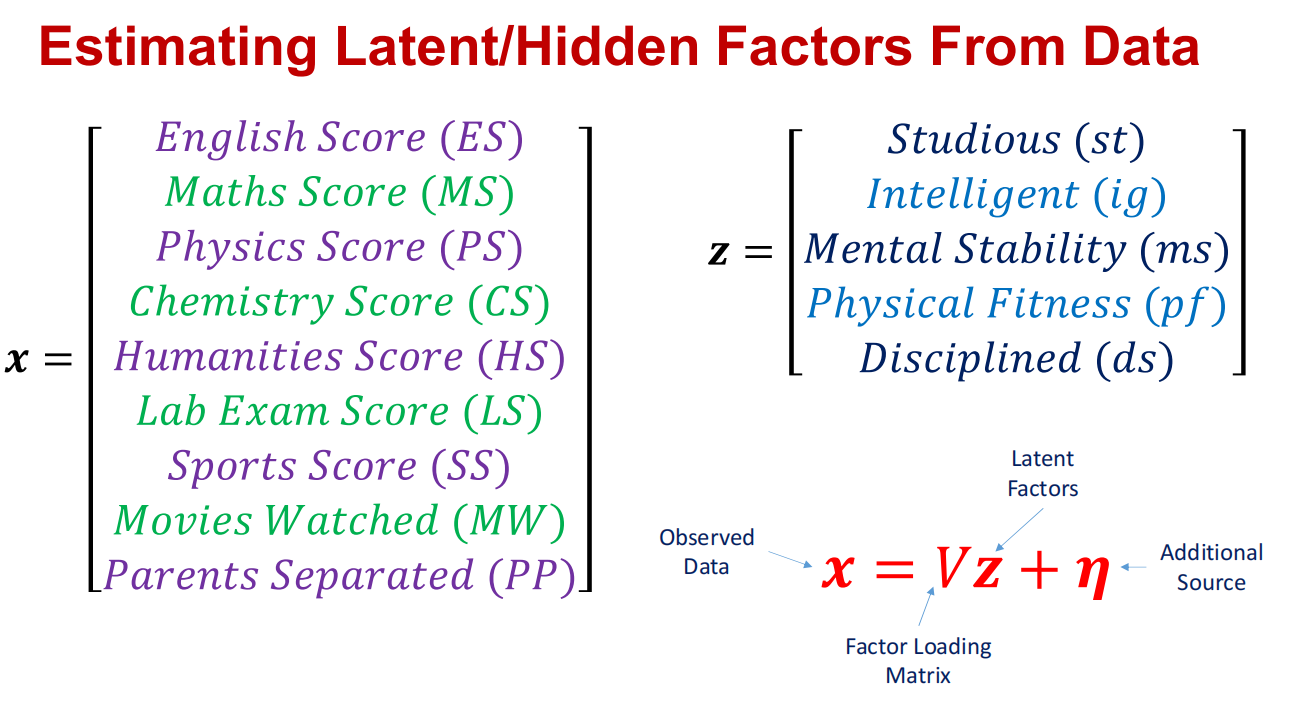

### EFA process

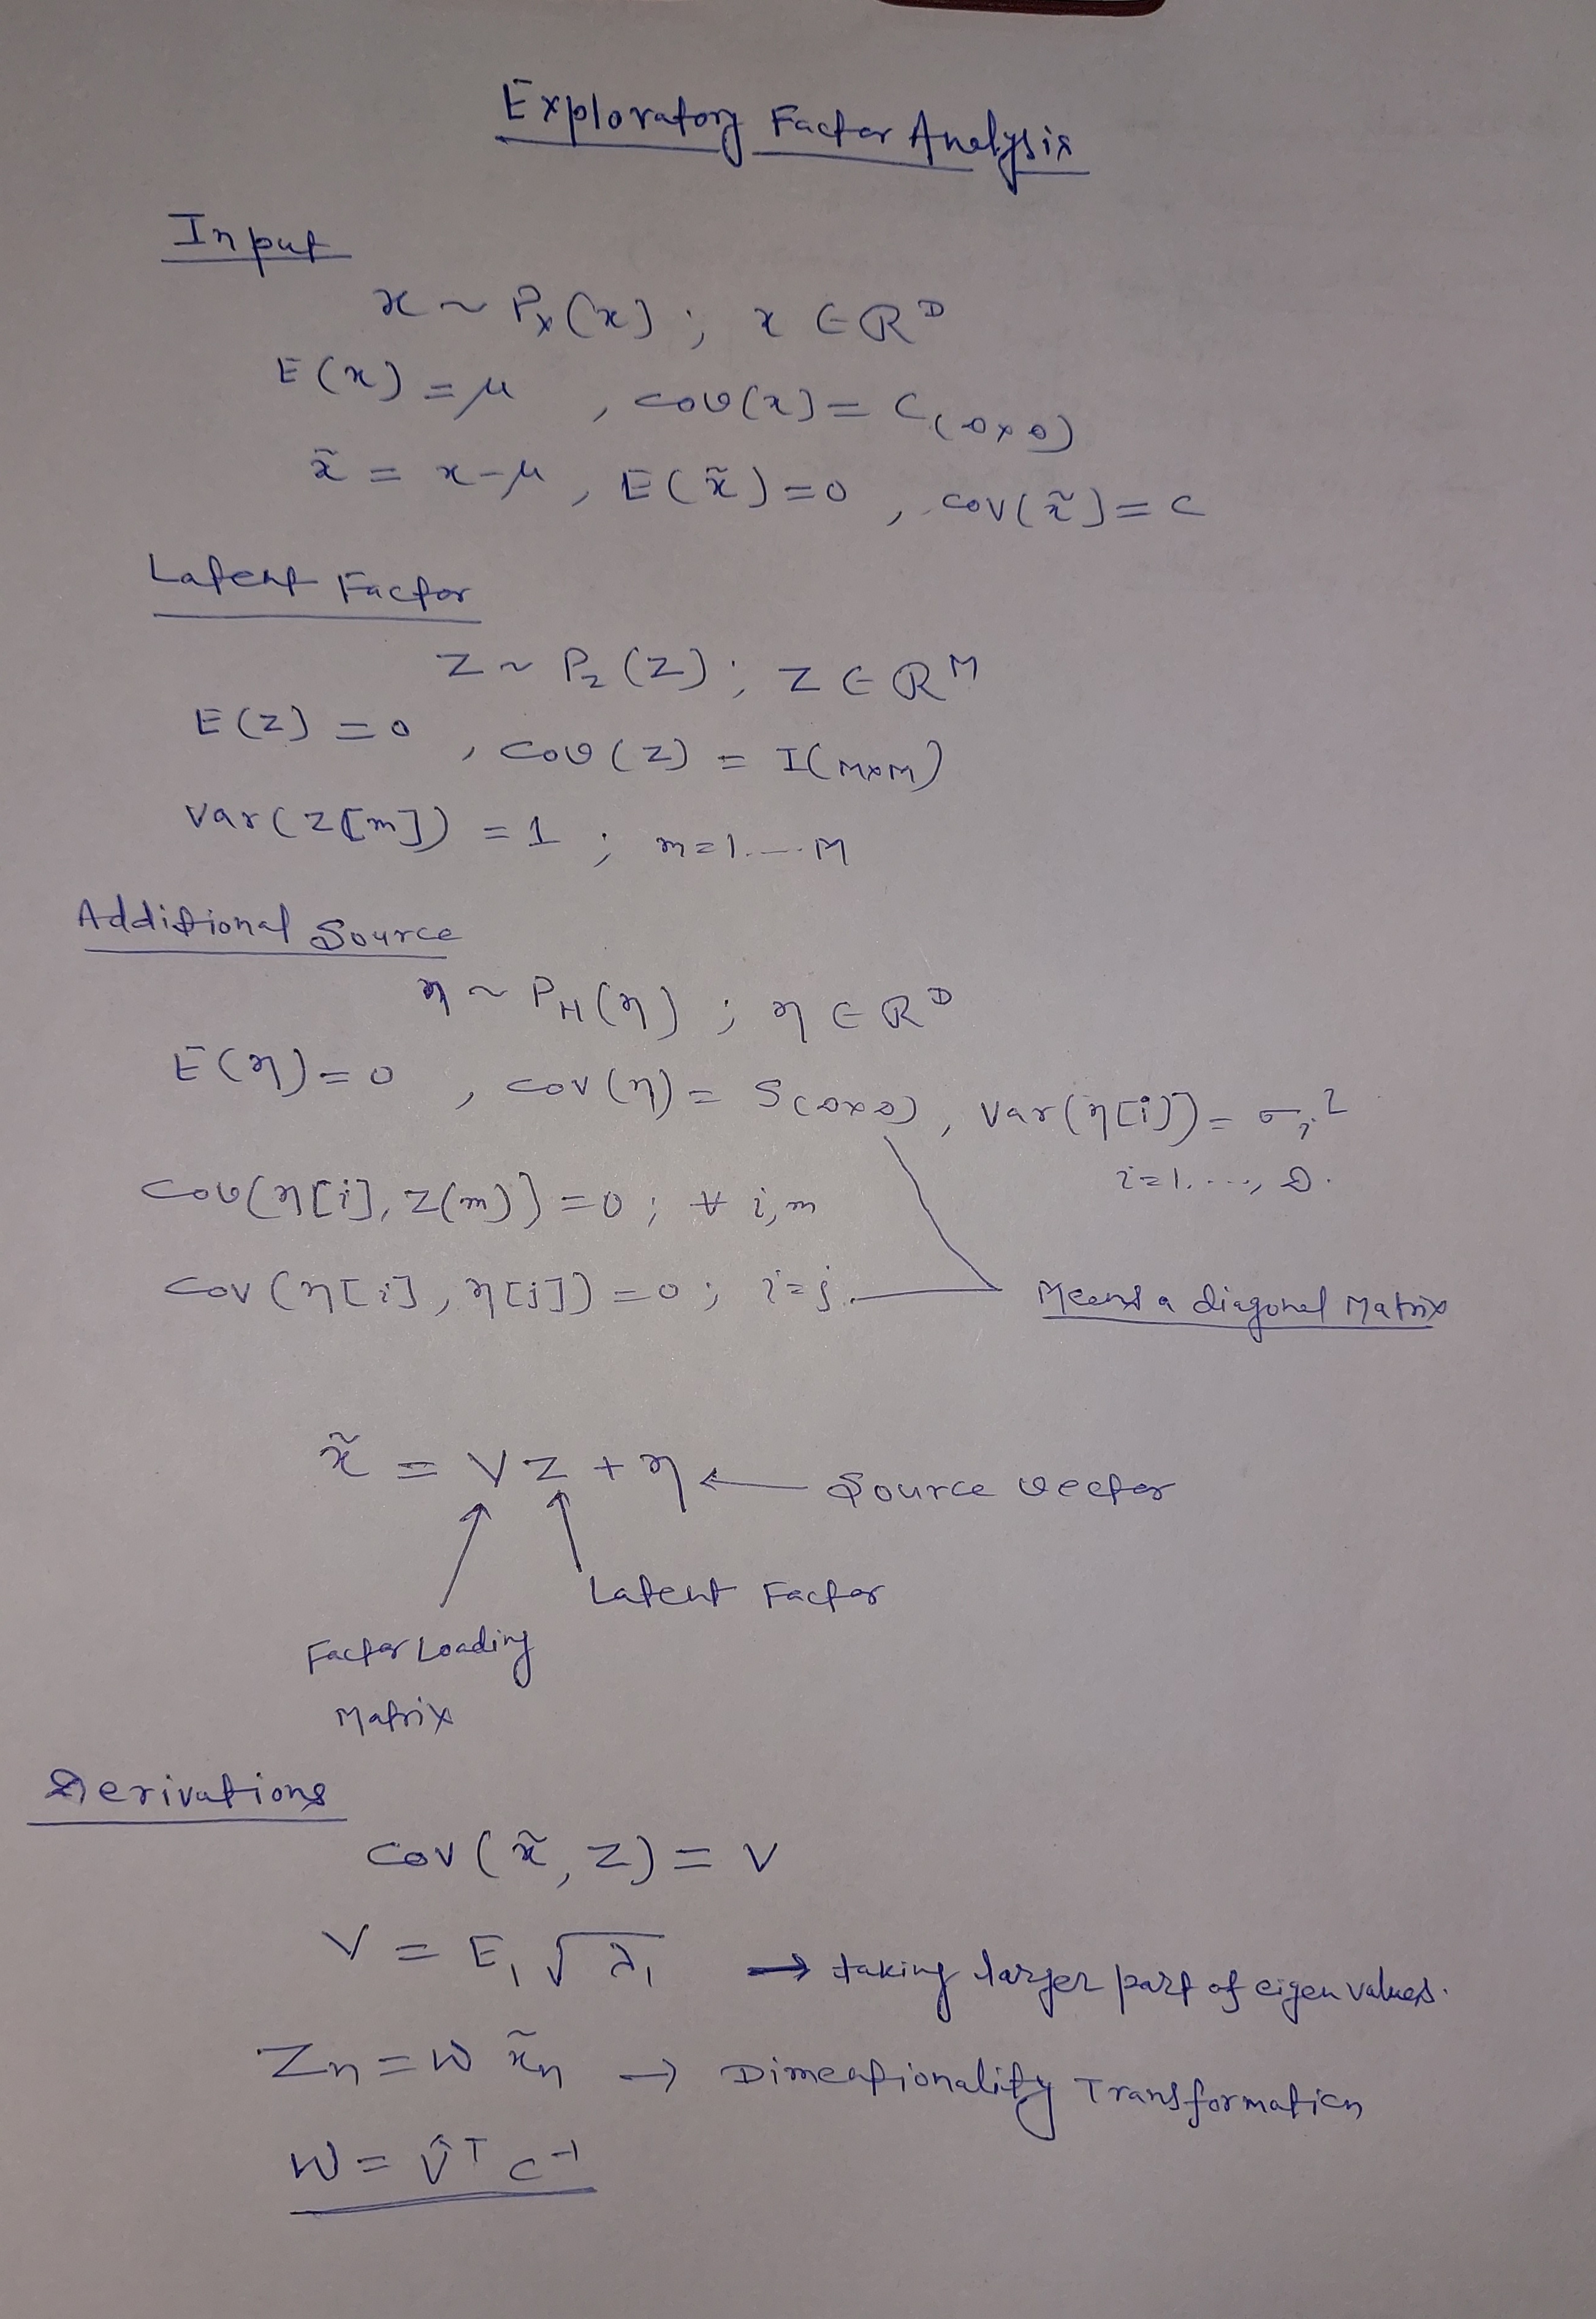

P(X), P(Z), P(η) ==> are probability distributions for X, Z and η respectively

**Generate the dataframe from the excel file**

In [14]:
df = pd.read_excel("beer_rnd_reduced.xlsx")
print(df.shape)
print(df)

(19, 7)
    cost  size  alcohol  reputat  color  aroma  taste
0     10    15       20       85     40     30     50
1    100    70       50       30     75     60     80
2     65    30       35       80     80     60     90
3      0     0       20       30     80     90    100
4     10    25       10      100     50     40     60
5     25    35       30       40     45     30     65
6      5    10       15       65     50     65     85
7     20     5       10       40     60     50     95
8     15    10       25       30     95     80    100
9     10    15       20       85     40     30     50
10   100    70       50       30     75     60     80
11    65    30       35       80     80     60     90
12     0     0       20       30     80     90    100
13    10    25       10      100     50     40     60
14    25    35       30       40     45     30     65
15     5    10       15       65     50     65     85
16    20     5       10       40     60     50     95
17    15    10      

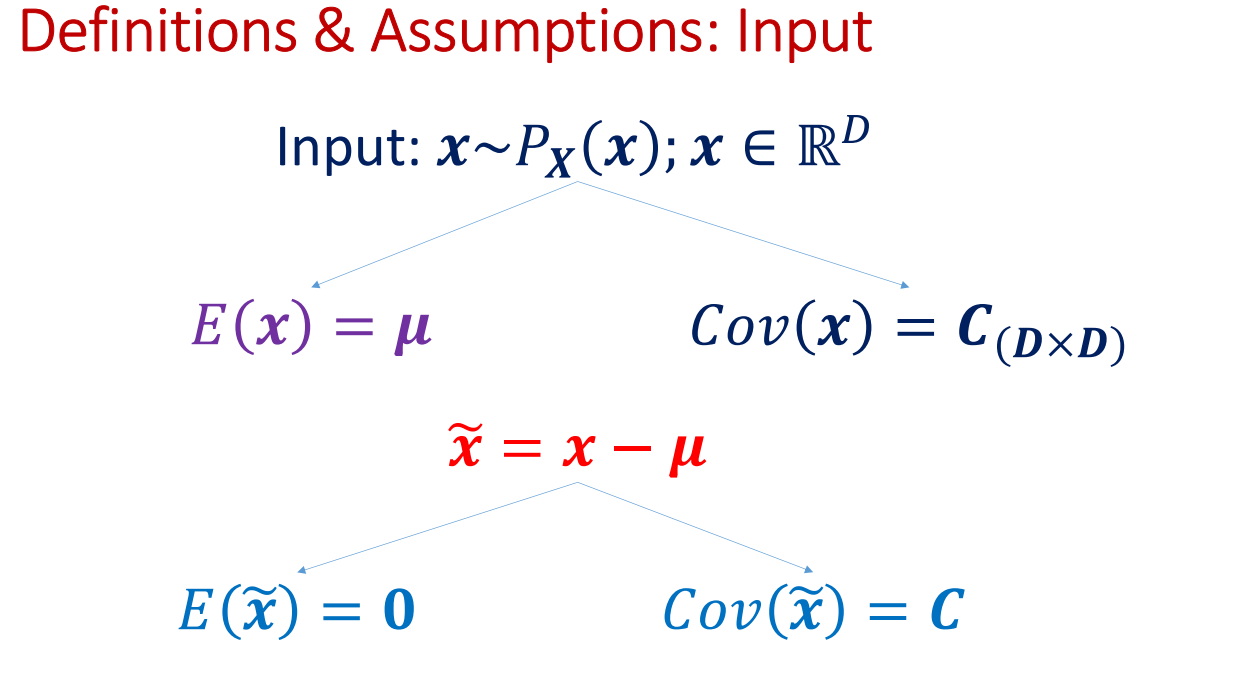

**Find $\tilde{x}_{n}$ from $x_{n}$**  where $\tilde{x} $   is the mean centered data set

In [15]:
x = df.values
x_mean = np.mean(x,axis=0)  # # axis = 0 takes column means
x_n = x - x_mean # mean centering

std = np.std(x_n)

## x_n = x_n/std  # we are not doing as of now can be done as well

x_n = x_n.T ## Converts row vectors to column vectors
print(x_n.shape)


(7, 19)


### Test whether to perform EFA or not:
Test whether the correlation matrix is an identity matrix, which would indicate that the factor model is inappropriate.

In [16]:
C2 = np.corrcoef(x_n)    ## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))
print(C2)


[[ 1.          0.87867423  0.87675773 -0.20052763  0.34212021  0.0115177
   0.09843894]
 [ 0.87867423  1.          0.82468892 -0.07981517  0.03752096 -0.24907249
  -0.2530088 ]
 [ 0.87675773  0.82468892  1.         -0.36629982  0.40073751  0.11443376
   0.07904386]
 [-0.20052763 -0.07981517 -0.36629982  1.         -0.55847769 -0.55644779
  -0.65691684]
 [ 0.34212021  0.03752096  0.40073751 -0.55847769  1.          0.83817565
   0.82281394]
 [ 0.0115177  -0.24907249  0.11443376 -0.55644779  0.83817565  1.
   0.87717777]
 [ 0.09843894 -0.2530088   0.07904386 -0.65691684  0.82281394  0.87717777
   1.        ]]


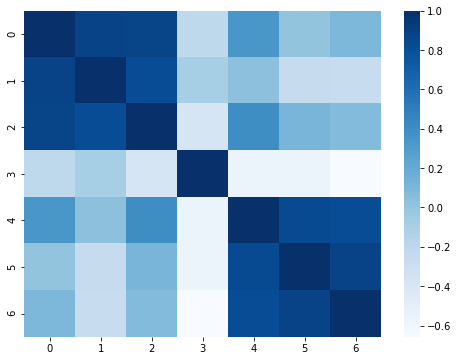

In [17]:
plt.figure(figsize=(8,6))
ax = sns.heatmap(C2,cmap='Blues')

### Now we compute covariance matrix of mean centered data set x_n and find eigen values and eigen vectors

In [18]:
C1 = np.cov(x_n)

eig_val,eig_vec = np.linalg.eig(C1)

print("eigen values : ", eig_val)

print("-------------------------------------------------------------")
print("eigen vectors : ", eig_vec)

eigen values :  [1642.95125211 1272.5513268   323.95400255   72.12232663    7.09847427
   21.56983247   43.0861185 ]
-------------------------------------------------------------
eigen vectors :  [[ 0.63494469  0.48780829  0.1878345   0.38814994 -0.35060552 -0.21834779
   0.04843719]
 [ 0.3063371   0.42094545 -0.12401137 -0.40484347  0.26997387  0.63272262
   0.276517  ]
 [ 0.24934947  0.14226984 -0.04181088 -0.34519873  0.61010296 -0.62620803
  -0.17975454]
 [-0.43721717  0.38740146  0.79322164 -0.01092102  0.16212564  0.00901466
   0.0554566 ]
 [ 0.34058457 -0.2679333   0.37936514 -0.21859882 -0.08098015  0.29892959
  -0.72428852]
 [ 0.25595332 -0.43791885  0.36352401 -0.446191   -0.25334561 -0.18346995
   0.56003004]
 [ 0.26107252 -0.38854374  0.20572567  0.56505584  0.57873806  0.19169883
   0.21812281]]


### use eigenvalues and scree plot to find number of factors

In [19]:
eig_sorted = np.sort(eig_val)[::-1]  # contains sorted eigen values
arg_sort = np.argsort(eig_val)[::-1] # contains the indexes of sorted eigen values

print("sorted eigen values : ", eig_sorted)

print("sorted eigen indexes : ", arg_sort)


sorted eigen values :  [1642.95125211 1272.5513268   323.95400255   72.12232663   43.0861185
   21.56983247    7.09847427]
sorted eigen indexes :  [0 1 2 3 6 5 4]


### Scree plot to find number of compnents

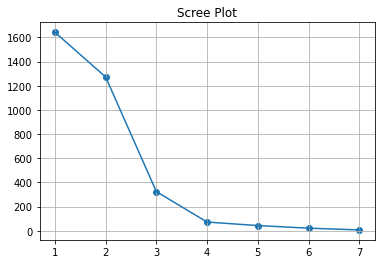

In [20]:
fig, ax = plt.subplots()
plt.scatter(range(1,x_n.shape[0]+1),eig_sorted)
ax.plot(range(1,x_n.shape[0] + 1), eig_sorted)
plt.grid()
ax.set_title("Scree Plot")

plt.show()

In [21]:
######## Sample code to show how much variance is captured with two compenents, this code is not needed as such ##########
a = eig_sorted[0] + eig_sorted[1]  
tot = sum(eig_sorted)

ratio = a/sum(eig_sorted)
print("ratio :",ratio)

ratio : 0.8617249001718179


**Extract the eigen vectors and eigen values based on number of factors choosen**

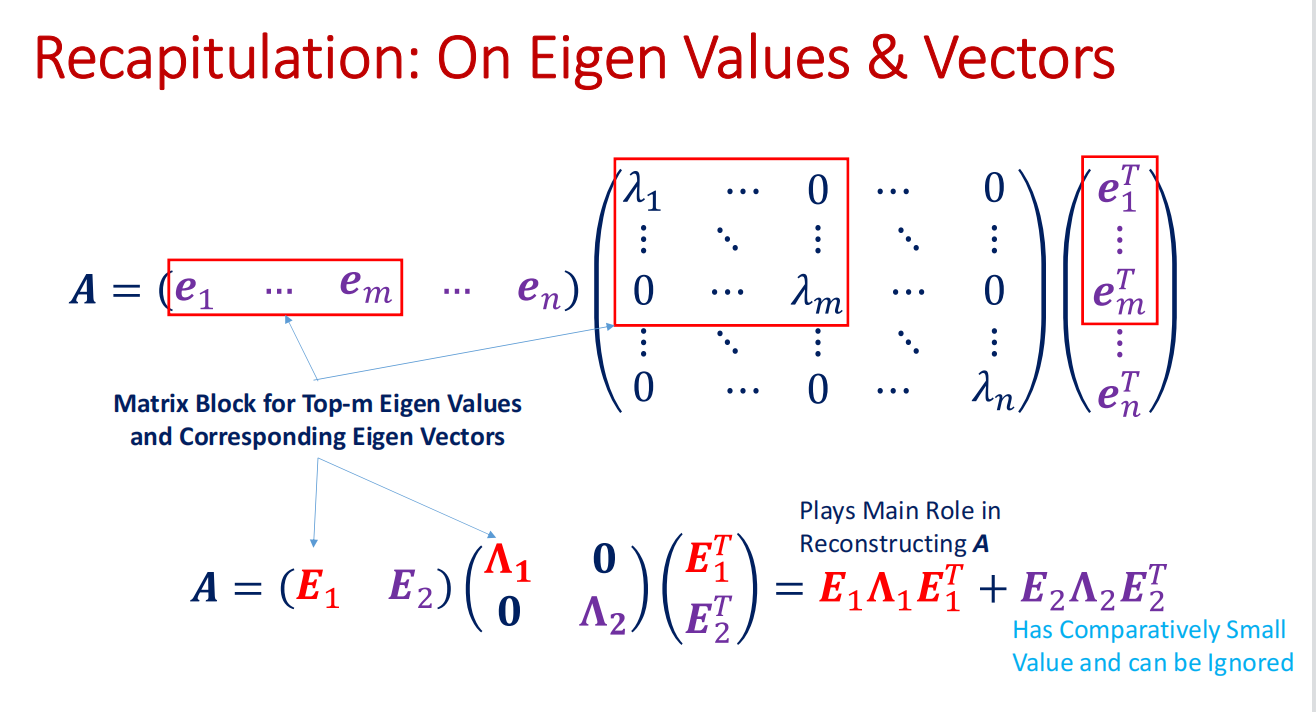

In [22]:
eig_vec_ls = []
eig_val_ls = []
imp_vec = arg_sort[:2]  # we choose two factors based on scree plots, so take first two indexes

for i in imp_vec:
    e_1 = eig_vec[:,i] # get the eigen vector columns based on index
    lambda_1 = eig_val[i] # get the eigen values based on index 
    
    eig_vec_ls.append(e_1) # add the eigen vector to the array
    eig_val_ls.append(lambda_1) # add the eigen value to the array
    
print("Eigen vectors : ", eig_vec_ls)
print("Eigen values", eig_val_ls)

Eigen vectors :  [array([ 0.63494469,  0.3063371 ,  0.24934947, -0.43721717,  0.34058457,
        0.25595332,  0.26107252]), array([ 0.48780829,  0.42094545,  0.14226984,  0.38740146, -0.2679333 ,
       -0.43791885, -0.38854374])]
Eigen values [1642.951252113008, 1272.5513268016452]


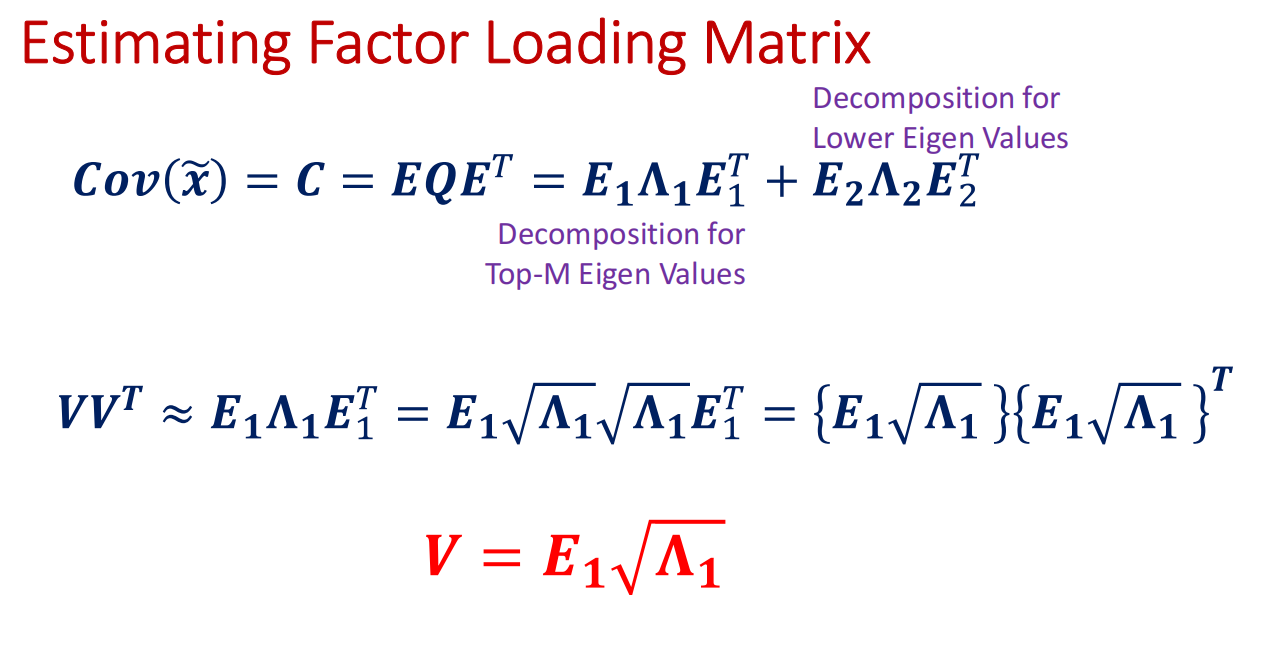

**Estimate V  the factor loading matrix**

In [24]:

print("eig_val_arr : ",eig_val_ls)

lambda_1 = np.diag(eig_val_ls) # with diagonalization calculating SQRT is easy

print("lambda 1 : ",lambda_1 )

eig_vec_mat = np.matrix(eig_vec_ls).T # convert to matrix

V = eig_vec_mat@np.sqrt(lambda_1) # E1 dot lambda1, we can use np.dot as well

print("============================  V   ===============================")
print(V)

## formatting as data frame to see the factors in better way
pd.DataFrame(V, columns=['Factor 1', 'Factor 2'],index=df.columns)

eig_val_arr :  [1642.951252113008, 1272.5513268016452]
lambda 1 :  [[1642.95125211    0.        ]
 [   0.         1272.5513268 ]]
============================  V   ===============================
[[ 25.7364257   17.4015057 ]
 [ 12.41686423  15.01631854]
 [ 10.1069656    5.07516886]
 [-17.72187007  13.81970914]
 [ 13.80502848  -9.55794098]
 [ 10.37464186 -15.62180803]
 [ 10.58214011 -13.86045751]]


,Factor 1,Factor 2
cost,25.736426,17.401506
size,12.416864,15.016319
alcohol,10.106966,5.075169
reputat,-17.721870,13.819709
color,13.805028,-9.557941
aroma,10.374642,-15.621808
taste,10.582140,-13.860458


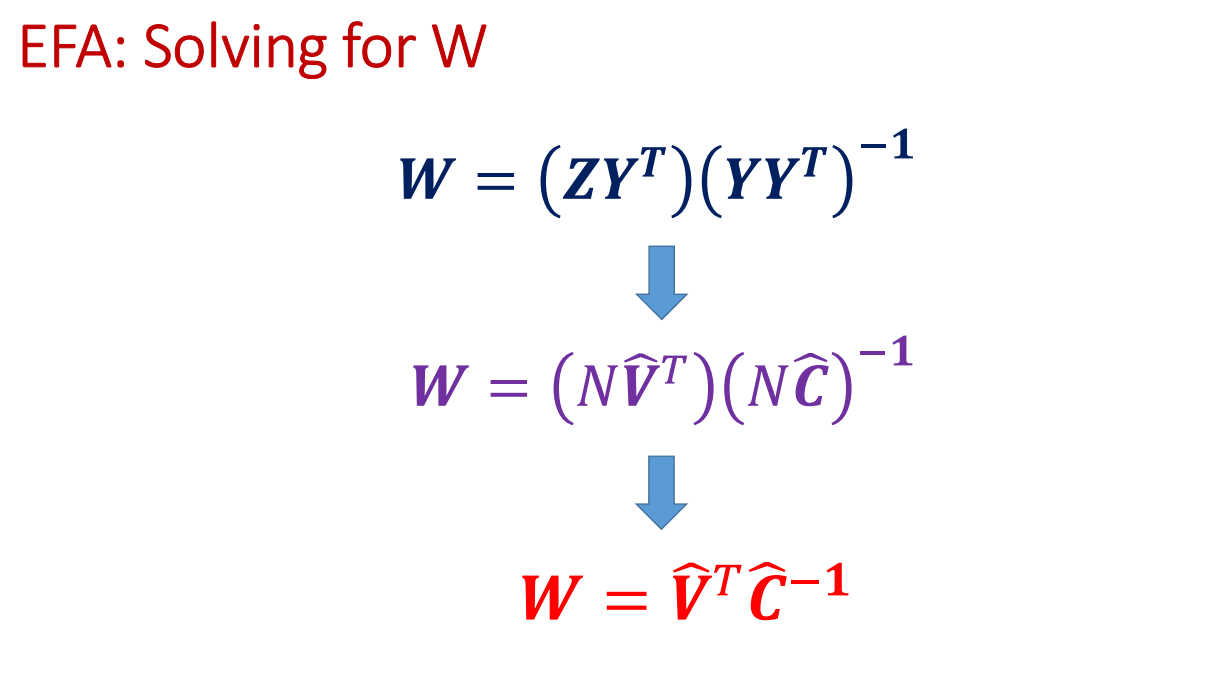

In [25]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)
print(W)


(2, 7)
[[ 0.01566475  0.00755766  0.00615171 -0.01078661  0.00840258  0.00631464
   0.00644093]
 [ 0.0136745   0.01180017  0.00398818  0.01085984 -0.00751085 -0.01227597
  -0.01089187]]


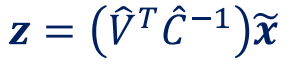
**Dimensionality reduction transformation**

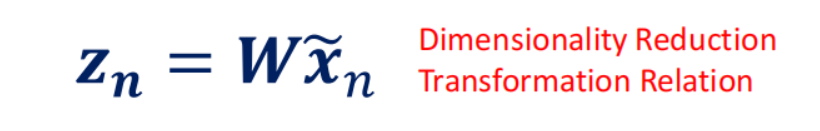


In [26]:
z = W@x_n  
z1 = z.T 
print(z1.shape)

#df1=pd.DataFrame(z1)
#sns.pairplot(df1)
#plt.show()

(19, 2)


In [27]:
z1

matrix([[-1.17190741,  0.76613586],
        [ 2.10816381,  1.21028941],
        [ 0.73240728,  0.5963717 ],
        [ 0.18837171, -1.72648882],
        [-1.10806557,  0.70036646],
        [-0.10024158,  0.55751336],
        [-0.5725751 , -0.48435819],
        [-0.08276991, -0.62956604],
        [ 0.59257047, -1.37333168],
        [-1.17190741,  0.76613586],
        [ 2.10816381,  1.21028941],
        [ 0.73240728,  0.5963717 ],
        [ 0.18837171, -1.72648882],
        [-1.10806557,  0.70036646],
        [-0.10024158,  0.55751336],
        [-0.5725751 , -0.48435819],
        [-0.08276991, -0.62956604],
        [ 0.59257047, -1.37333168],
        [-1.17190741,  0.76613586]])

In [28]:
print(df)

    cost  size  alcohol  reputat  color  aroma  taste
0     10    15       20       85     40     30     50
1    100    70       50       30     75     60     80
2     65    30       35       80     80     60     90
3      0     0       20       30     80     90    100
4     10    25       10      100     50     40     60
5     25    35       30       40     45     30     65
6      5    10       15       65     50     65     85
7     20     5       10       40     60     50     95
8     15    10       25       30     95     80    100
9     10    15       20       85     40     30     50
10   100    70       50       30     75     60     80
11    65    30       35       80     80     60     90
12     0     0       20       30     80     90    100
13    10    25       10      100     50     40     60
14    25    35       30       40     45     30     65
15     5    10       15       65     50     65     85
16    20     5       10       40     60     50     95
17    15    10       25     